#### Regression problem

In this problem we'll try out a simple machine learning application. We will try and predict the "feels like" temperature from some other variables. Check out the "bike sharing demand" kaggle challenge for a similar application!

1. Load in the train and test set, the training set is what the algorithm learns from and the test set is unseen data that we evaluate our model on. You'll need to separate the target variable from both datasets, that means you'll end up with 4 variables: test_X, test_y, train_X, train_y. The X variables will include temp, humidity and windspeed and the y variables will include atemp. What is the cross validation set?

temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed

2. Now train a random forest regressor on the train data and evaluate it on the test data. Try printing the RMSE and make a plot of the two arrays. What do you notice? What happens if you remove features from the dataset? 

For clues on what to do, look at:
https://towardsdatascience.com/random-forest-and-its-implementation-71824ced454f

3. Extension 1: repeat the last step on a different model, try a gradient boosting model for example. Is this model better?
https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
https://medium.com/fintechexplained/bagging-vs-boosting-in-machine-learning-8d7512d782e0

4. Extension 2: Try the bike hsaring demand kaggle challenge! What happens when we start predicting variables that have more randomness in the system? 


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [110]:
# Loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# Taking out the datetime columns
dt_train = train['datetime']
dt_test = test['datetime']

# Initialising a blank list, so I can append the unpacked values to it 
dts_train = []
dts_test = []
for i in range(0,len(dt_train)):
    dts_train.append(datetime.strptime(dt_train[i], "%m/%d/%y %H:%M")) 
for i in range(0,len(dt_test)):
    dts_test.append(datetime.strptime(dt_test[i], "%m/%d/%y %H:%M")) 

# Also pulling out the perceived temp so this can be excluded from the regression later 
test_atemp = test['atemp']
train_atemp = train['atemp']

# Now putting the reformatted datetimes back in and 
train['datetime'] = dts_train
train = train.drop(['atemp'],axis=1)
train = train.set_index('datetime')
test['datetime'] = dts_test
test = test.drop(['atemp'],axis=1)
test = test.set_index('datetime')

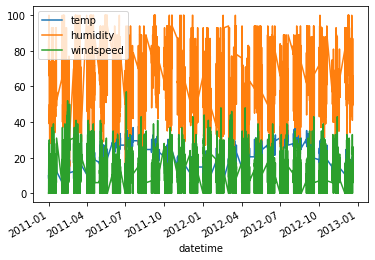

In [111]:
train.plot()

## Random forest regression

In [112]:
# Code from Kaggle https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile
from sklearn.ensemble import RandomForestRegressor
# This creates the random forest regression
rfModel = RandomForestRegressor(n_estimators=1000) 
rfModel.fit(train,train_atemp)
# predictions, one on the training data, one on the test data
train_preds = rfModel.predict(train) 
test_preds = rfModel.predict(test)

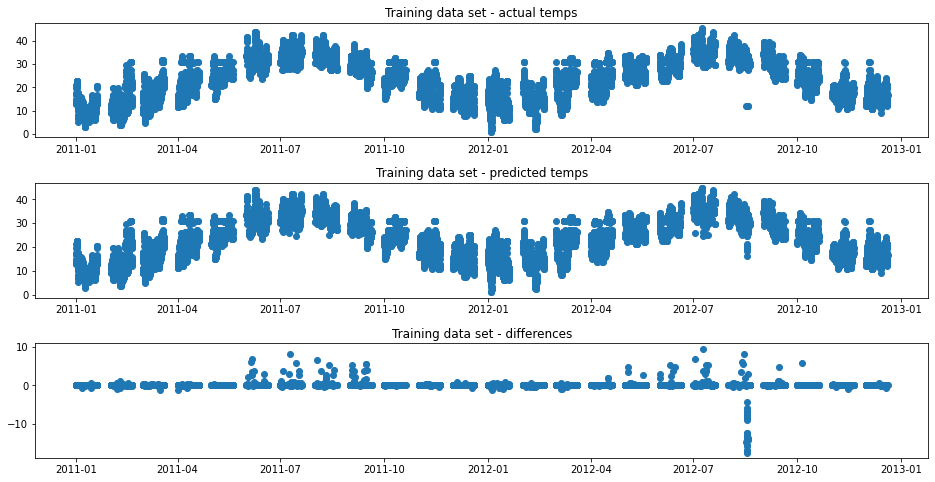

In [131]:
# Making a figure to compare them
fig = plt.figure(figsize=(16, 8))
plt.subplots_adjust(hspace=0.4)
ax1 = fig.add_subplot(3,1,1)
ax1.title.set_text('Training data set - actual temps')
ax1.scatter(dts_train,train_atemp)
# 
ax2 = fig.add_subplot(3,1,2)
ax2.title.set_text('Training data set - predicted temps')
ax2.scatter(dts_train,train_preds)
# 
diffs = train_atemp - train_preds
ax3 = fig.add_subplot(3,1,3)
ax3.title.set_text('Training data set - differences')
ax3.scatter(dts_train,diffs)

# It looks like the variances are in August - Sep 2012, was there any extreme weather then?
# Also these chunks of timestamps are because the data are 20-31 of each month (splitting the data)

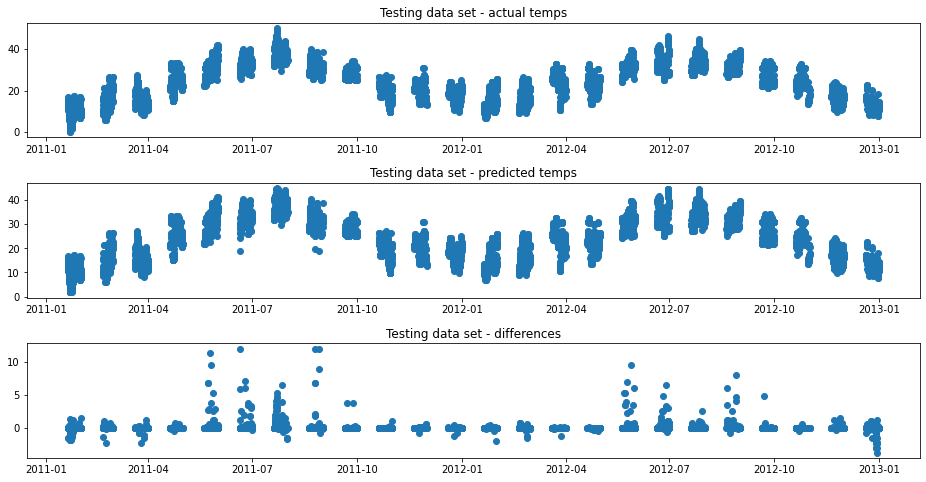

In [132]:
# Making a figure to compare them
fig2 = plt.figure(figsize=(16, 8))
plt.subplots_adjust(hspace=0.4)
ax4 = fig2.add_subplot(3,1,1)
ax4.title.set_text('Testing data set - actual temps')
ax4.scatter(dts_test,test_atemp)
# 
ax5 = fig2.add_subplot(3,1,2)
ax5.title.set_text('Testing data set - predicted temps')
ax5.scatter(dts_test,test_preds)
# 
diffs_test = test_atemp - test_preds
ax6 = fig2.add_subplot(3,1,3)
ax6.title.set_text('Testing data set - differences')
ax6.scatter(dts_test,diffs_test)

# It looks like the variances are in August - Sep 2012, was there any extreme weather then?
# Also these chunks of timestamps are because the data are 20-31 of each month (splitting the data)

In [107]:
# MSE
test_errors = (test_preds - test_atemp)**2
train_errors = (train_preds - train_atemp)**2
print('Training MSE:', round(np.mean(train_errors), 3), 'degrees celsius.')
print('Test MSE:', round(np.mean(test_errors), 3), 'degrees celsius.')

Training MSE: 0.451 degrees celsius.
Test MSE: 0.367 degrees celsius.


In [142]:
print('Train standard deviation :', round(train_atemp.std(),3)) # Since the standard deviation is 8.47 having MSE of 0.36 seems ok
print('Test standard deviation :', round(test_atemp.std(),3)) # Since the standard deviation is 8.47 having MSE of 0.36 seems ok

Train standard deviation : 8.475
Test standard deviation : 8.783


**Removing features**

**Notes**
* Ensemble learning - takes multiple predictions from different algorithms or runs
* Model made of several is an 'ensemble learning model'
* Two flavours: boosting is about increasing accuracy?, bagging is about splitting apart training data
* Random forest is bagging, and makes multiple decision trees (thus forest...)
* You do random forest by picking out subset of training data and making individual decision trees
* Decision trees asks a question and then chooses different answers depending on inputs 
* Decision tree output can be categorical or numerical
* Top of tree is called root/root node, ends are leaf nodes or just 'leaves'
* Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification. 
* An ensemble of randomized decision trees is known as a random forest.


*Python for Data Science textbook - chapter on decision trees and random forests*

https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

**Correlation plot**

This could be useful, an example here https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile

**Rolling average**

This section does an average over a 24 hour period, trying to reduce some of the noise of night/day temperatures - though this might have limitations. 

In [136]:
train['rtemp'] = train['temp'].rolling(24).mean()
train['ratemp'] = train['atemp'].rolling(24).mean()
train['rhum'] = train['humidity'].rolling(24).mean()
train['rwin'] = train['windspeed'].rolling(24).mean()
train['ratemp']= train['atemp'].rolling(24).mean()

KeyError: 'atemp'

In [ ]:
train2 = train.drop(['temp','atemp','humidity','windspeed'],axis=1)
train2.head(2)

In [ ]:
# Plotting the rolling averages
train2.plot()